In [3]:
import sqlite3

## Connecting with SQlite db

In [6]:
db=sqlite3.connect('IMDB.sqlite')

In [7]:
db

#### Creating new database

In [8]:
db=sqlite3.connect('school.sqlite')

***This will create a blank sqlite db for us. We can use db browser to visualize this db***

## Cursor Object

In [11]:
cur=db.cursor()

In [13]:
sql_query='create table student(rollno int primary key, name text, age int)'

cur.execute(sql_query)

In [14]:
cur.execute('insert into student values(101,"Aman",20)')

##### Commiting the transaction

In [16]:
db.commit()

In [17]:
cur.execute('insert into student values(102,"Saurav",21)')

In [18]:
db.commit()

In [19]:
db.close()

###### Ques. Create employee database and Emplyee Table

In [23]:
import sqlite3
db=sqlite3.connect('Employee.sqlite')

In [24]:
cur=db.cursor()

In [25]:
cur.execute('create table Employee(employee_id int primary key, name text, age int, department text, salary int)')

In [26]:
cur.execute('insert into Employee values(100,"Rishav",25,"Marketing",50000)')
db.commit()

In [27]:
cur.execute('insert into Employee values(101,"Abhishek",26,"Operations",60000)')
db.commit()

In [28]:
cur.execute('insert into Employee values(102,"Aman",24,"Human Resource",75000)')
db.commit()

### Passing the paramters in query

In [35]:
db=sqlite3.connect('school.sqlite')

In [37]:
cur=db.cursor()

In [38]:
cur.execute('insert into student values(103,"Mohit",24)')

In [39]:
db.commit()

In [40]:
rollNo=104
Name="Nikhil"
Age=34


sql_query="insert into student values({},{},{})".format(rollNo,Name,Age)

In [42]:
cur.execute?

In [43]:
'Insert into student values(?,?,?)',(rollNo, Name, Age)

('Insert into student values(?,?,?)', (104, 'Nikhil', 34))

In [44]:
cur.execute('Insert into student values(?,?,?)',(rollNo, Name, Age))

In [45]:
db.commit()

In [52]:
rollNo=105
Name="Nikhila"
Age=35


sql_query='''insert into student values({},"{}",{})'''.format(rollNo,Name,Age)
cur.execute(sql_query)
db.commit()

'insert into student values(105,"Nikhila",35)'

In [54]:
values=[(106,"Nidhi",20),(108,"Manisha",21),(107,"Ankush",22)]

cur.executemany('Insert into student values(?,?,?)',values)
db.commit()

#### Update and Delete

In [56]:
cur.execute('Update student set age=30')

In [57]:
db.commit()

#### Updating with condition

In [59]:
cur.execute('Update student set age=20 where rollno=103')

In [60]:
db.commit()

##### Using arguements to update

In [65]:
roll=103

cur.execute('Update student set age=43 where rollNo=?',(roll,))

In [66]:
db.commit()

## Ques Drop index

In [67]:
db=sqlite3.connect('Employee.sqlite')

In [68]:
cur=db.cursor()

In [69]:
cur.execute('delete from  employee where employee_id=101')

In [70]:
db.commit()

##### Ques Dropping with paramter

In [71]:
rollNo=102

cur.execute('delete from employee where employee_id=?',(rollNo,))

In [72]:
db.commit()

#### Ques Update SQL Table

In [73]:
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]

In [74]:
query_list=[]

for i in range(len(employee_id)):
    temp_tuple=(employee_id[i],name[i], age[i],department[i],salary[i])
    query_list.append(temp_tuple)

In [76]:
# Adding into employee database

cur.executemany('Insert into employee values(?,?,?,?,?)', query_list)

In [77]:
db.commit()

## Fetch Data

In [78]:
db=sqlite3.connect('school.sqlite')

In [79]:
cur=db.cursor()

In [87]:
cur.execute('Select * from student')


In [82]:
for row in cur:
    print(row)

(101, 'Aman', 30)
(102, 'Saurav', 30)
(103, 'Mohit', 43)
(104, 'Nikhil', 30)
(105, 'Nikhila', 30)
(106, 'Nidhi', 30)
(108, 'Manisha', 30)
(107, 'Ankush', 30)


In [89]:
cur.execute('Select * from student')
cur.fetchone()

(101, 'Aman', 30)

In [90]:
cur.fetchmany(3)

[(102, 'Saurav', 30), (103, 'Mohit', 43), (104, 'Nikhil', 30)]

In [91]:
cur.fetchmany()

[(105, 'Nikhila', 30)]

In [92]:
cur.fetchall()

[(106, 'Nidhi', 30), (108, 'Manisha', 30), (107, 'Ankush', 30)]

#### Ques Finance Employee SQLite

In [121]:
import sqlite3

db=sqlite3.connect('Employee.sqlite')

In [122]:
cur=db.cursor()

In [124]:
cur.execute('delete from employee where employee_id=100')
db.commit()

In [125]:
cur.execute('Select employee_id from employee where department="Finance"')

In [126]:
cur.fetchall()

[(103,), (107,)]

#### Ques. Find Employee

In [132]:
cur.execute('Select department, count(department) from employee group by department')

In [133]:
cur.fetchall()

[('Finance', 2),
 ('Human Resource', 2),
 ('IT', 2),
 ('Marketing', 4),
 ('Operations', 2)]

## SQLite with Pandas

In [137]:
db=sqlite3.connect('school.sqlite')
cur=db.cursor()

In [138]:
import pandas as pd

In [141]:
#pd.read_sql_query?

In [142]:
df=pd.read_sql_query('select * from student', db)

In [145]:
df[df['age']<31]

,rollno,name,age
0,101,Aman,30
1,102,Saurav,30
3,104,Nikhil,30
4,105,Nikhila,30
5,106,Nidhi,30
6,108,Manisha,30
7,107,Ankush,30


##### Converting data frame to table

In [150]:
data=pd.DataFrame([[201,'Aman','English',2000],[202,'Komal','Maths',22000],[203,'Mahesh','Science',20000]], columns=['ID','Name','Course','Salaray'])

In [151]:
data

,ID,Name,Course,Salaray
0,201,Aman,English,2000
1,202,Komal,Maths,22000
2,203,Mahesh,Science,20000


In [153]:
data.to_sql?

In [149]:
data.to_sql('Faculty',db)

#### Adding another column

In [155]:
data=pd.read_sql_query('Select * from Faculty',db)
data["Address"]='test'
data.to_sql("Faculty",db,if_exists='replace')

## Ques Count Genre

In [157]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 9C86-D6F3

 Directory of C:\Users\rachi\Desktop\Coding ninjas cpp\Python Codes\SQLlite

26-08-2021  23:52    <DIR>          .
26-08-2021  23:52    <DIR>          ..
26-08-2021  08:55    <DIR>          .ipynb_checkpoints
10-03-2019  17:44    <DIR>          __MACOSX
26-08-2021  09:04            36,133 0000000000001822.zip
28-02-2019  11:25             4,893 Connect With DB.ipynb
26-08-2021  20:38            12,288 Employee.sqlite
26-02-2019  00:34            86,016 IMDB.sqlite
26-08-2021  23:51            20,480 school.sqlite
26-08-2021  23:52            26,831 SQLITE.ipynb
               6 File(s)        186,641 bytes
               4 Dir(s)  44,666,753,024 bytes free


In [158]:
import sqlite3
import pandas as pd

In [159]:
db=sqlite3.connect('IMDB.sqlite')

In [160]:
db

In [161]:
df=pd.read_sql_query('Select * from genre',db)

In [168]:
df.groupby('genre')['genre'].count()

genre
             41
Action       33
Adventure    43
Animation    13
Biography    21
Comedy       31
Crime        11
Drama        77
Family        3
Fantasy       7
History       6
Horror        2
Music         3
Musical       1
Mystery       7
Romance      13
Sci-Fi       18
Sport         3
Thriller     14
War           2
Western       2
Name: genre, dtype: int64

### Ques. IMDB Movie

In [169]:
import sqlite3
import pandas as pd

In [170]:
db=sqlite3.connect('IMDB.sqlite')

In [171]:
df=pd.read_sql_query('select * from IMDB inner join earning on IMDB.Movie_id=earning.Movie_ID', db)

In [172]:
df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Movie_id,Domestic,Worldwide
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.8,7.8,8.1,8.0,7.7,8.3,8.0,36809,56671993,1.877332e+08
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.3,7.3,7.5,7.6,7.0,7.7,7.6,30114,18335230,6.073880e+07
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.4,7.4,7.5,7.4,7.0,7.9,7.6,37367,35014192,3.918778e+07
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.5,7.8,7.7,6.9,7.8,7.7,49473,15322921,8.710045e+07
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.9,7.8,8.1,6.6,7.2,7.9,7.8,14867,6739492,1.983949e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.1,8.1,8.2,8.7,8.0,8.6,8.4,38262,13092000,4.898204e+07
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.4,7.4,7.5,7.4,7.2,7.9,7.6,10023,189422889,4.712229e+08
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.7,7.7,7.9,7.5,7.4,8.1,7.9,27783,233921534,7.478628e+08
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.6,7.5,7.7,7.6,7.3,7.8,7.7,42294,146408305,3.536241e+08


In [173]:
df['sum']=df.Domestic+df.Worldwide

In [174]:
df.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Movie_id,Domestic,Worldwide,sum
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.8,8.1,8.0,7.7,8.3,8.0,36809,56671993,187733202.0,244405195.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.3,7.5,7.6,7.0,7.7,7.6,30114,18335230,60738797.0,79074027.0
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.4,7.5,7.4,7.0,7.9,7.6,37367,35014192,39187783.0,74201975.0
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.5,7.8,7.7,6.9,7.8,7.7,49473,15322921,87100449.0,102423370.0
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.8,8.1,6.6,7.2,7.9,7.8,14867,6739492,19839492.0,26578984.0


In [175]:
df.sort_values?

In [180]:
df.sort_values(by='sum', ascending=False).iloc[0].Rating

8.1

In [181]:
pd.merge?

## Ques Most Voted movie

In [182]:
import sqlite3
import pandas as pd

In [184]:
db=sqlite3.connect('IMDB.sqlite')

In [188]:
df=pd.read_sql_query('Select * from IMDB',db)

In [194]:
result=df.sort_values(by='TotalVotes',ascending=False).iloc[0]

In [195]:
print(result.Title, result.Rating)

Inception (2010) 8.8


### Longest Running Time

In [196]:
import sqlite3
import pandas as pd

In [197]:
db=sqlite3.connect('IMDB.sqlite')

In [198]:
df=pd.read_sql_query('Select * from IMDB',db)

In [203]:
pd.unique(df.Runtime.isna())

array([False])

##### Dropping '' runtime values

In [212]:
df.drop(df[df.Runtime==''].index,inplace=True)

In [214]:
df.reset_index(inplace=True)

##### Converting Runtime to numerics

In [215]:
df.Runtime

0     134 min
1      94 min
2     100 min
3     123 min
4     127 min
       ...   
91    140 min
92    107 min
93    132 min
94    132 min
95    108 min
Name: Runtime, Length: 96, dtype: object

In [223]:
def correct_Time(time):
    time_array=time.split(' ')
    time=float(time_array[0])
    return(time)
df['correct_time']=df.Runtime.apply(correct_Time)

In [227]:
df.sort_values(by='correct_time',ascending=False).iloc[0]

index                                      105
Movie_id                                 35004
Title           The Wolf of Wall Street (2013)
Rating                                     8.2
TotalVotes                              881984
MetaCritic                                  75
Budget                             100000000.0
Runtime                                180 min
CVotes10                                171660
CVotes09                                236650
CVotes08                                250667
CVotes07                                129164
CVotes06                                 46715
CVotes05                                 18682
CVotes04                                  8674
CVotes03                                  5854
CVotes02                                  4258
CVotes01                                  9689
CVotesMale                              559564
CVotesFemale                            123698
CVotesU18                                 3622
CVotesU18M   

In [228]:
result=df.sort_values(by='correct_time',ascending=False).iloc[0]

In [229]:
print(result.Title, result.Runtime)

The Wolf of Wall Street (2013) 180 min


## Ques. Maximum Profit

In [290]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')

In [291]:
imdb=pd.read_sql_query('Select * from IMDB',db)

In [292]:
earning=pd.read_sql_query('Select * from earning',db)

In [293]:
FullDF=pd.merge(imdb,earning, how='inner', left_on='Movie_id', right_on='Movie_id')

In [294]:
# Dropping empty values in Budget column
FullDF.drop(FullDF[FullDF.Budget==''].index, inplace=True)
FullDF.reset_index(inplace=True)

In [295]:
FullDF

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,56671993,1.877332e+08
1,1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,18335230,6.073880e+07
2,2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,...,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,35014192,3.918778e+07
3,3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,...,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,15322921,8.710045e+07
4,4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,...,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,6739492,1.983949e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,...,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4,13092000,4.898204e+07
110,113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,...,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6,189422889,4.712229e+08
111,114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,...,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9,233921534,7.478628e+08
112,115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,...,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,146408305,3.536241e+08


In [296]:
#Converting Budget Column to numeric
FullDF.Budget=pd.to_numeric(FullDF.Budget)

In [297]:
FullDF['Net Profit']=FullDF.Domestic+FullDF.Worldwide-FullDF.Budget

In [298]:
FullDF.sort_values(by='Net Profit',ascending=False).iloc[0].Title

'Star Wars: The Force Awakens\xa0(2015)'

#### Least Budget

### Lets use the previous Dataframe itself

In [303]:
FullDF.sort_values(by='Budget')

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide,Net Profit
106,109,20709,Tyrannosaur (2011),7.6,26016,65,1000000.0,,2060,4083,...,7.5,7.4,5.8,6.5,7.4,7.6,,22321,2.232100e+04,-9.553580e+05
68,71,30154,Short Term 12 (2013),8.0,63459,82,1000000.0,,9518,14786,...,7.7,7.7,8.0,8.5,7.0,8.3,7.9,1013100,1.013100e+06,1.026200e+06
108,111,35939,What We Do in the Shadows (2014),7.6,87975,76,1600000.0,,10485,14507,...,7.3,7.3,7.7,7.7,6.8,7.7,7.5,3469224,6.263224e+06,8.132448e+06
42,43,23963,Hunt for the Wilderpeople (2016),7.9,56964,81,2500000.0,,7503,12086,...,7.7,7.6,8.2,8.0,7.1,8.0,7.8,5205468,5.205468e+06,7.910936e+06
7,7,25398,Before Midnight (2013),7.9,106553,94,3000000.0,109 min,16953,22109,...,7.3,7.4,7.2,8.5,7.0,8.0,7.9,8114627,1.117647e+07,1.629110e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,79,38626,Star Wars: The Force Awakens (2015),8.1,676732,81,245000000.0,136 min,155391,161810,...,7.9,7.8,8.2,8.3,7.7,8.2,7.9,936662225,2.068224e+09,2.759886e+09
13,13,49590,Captain America: Civil War (2016),7.9,431555,75,250000000.0,147 min,81893,90156,...,7.6,7.6,7.9,7.7,7.5,8.1,7.7,408084349,1.153304e+09,1.311389e+09
35,36,21411,Harry Potter and the Deathly Hallows: Part 1 (...,7.7,363226,65,250000000.0,146 min,68937,54947,...,7.4,7.3,8.0,8.0,6.7,7.9,7.5,295983305,9.602833e+08,1.006267e+09
83,86,29419,The Dark Knight Rises (2012),8.4,1240780,78,250000000.0,164 min,380589,341965,...,7.9,7.9,7.9,7.8,7.8,8.4,8.4,448139099,1.084939e+09,1.283078e+09


### Highest Grossing Movie Each Year

In [304]:
import sqlite3
import pandas as pd

In [305]:
df=sqlite3.connect('IMDB.sqlite')

In [306]:
imdb=pd.read_sql_query('Select * from IMDB',db)

In [308]:
earning=pd.read_sql_query('Select * from earning',db)

In [310]:
earning.head(1)

,Movie_id,Domestic,Worldwide
0,36809,56671993,187733202.0


In [311]:
imdb.head(1)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0


In [312]:
#pd.merge?

In [313]:
mergedDF=pd.merge(imdb,earning,left_on='Movie_id', right_on='Movie_id')

In [315]:
mergedDF.head(1)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,56671993,187733202.0


In [316]:
mergedDF['Total Earning']=mergedDF.Worldwide+mergedDF.Domestic

In [318]:
mergedDF.head(1)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide,Total Earning
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.8,7.8,8.1,8.0,7.7,8.3,8.0,56671993,187733202.0,244405195.0


In [326]:
# Constructing year from title
mergedDF.iloc[1].Title.split(' ')[1].split('(')[1].split(')')[0]

'2010'

In [335]:
def getYear(Title):
    #print(Title)
    return(Title.split(' ')[-1].split('(')[1].split(')')[0])

mergedDF['Year']=mergedDF.Title.apply(getYear)

In [337]:
mergedDF.head(1)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide,Total Earning,Year
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.8,8.1,8.0,7.7,8.3,8.0,56671993,187733202.0,244405195.0,2013


In [343]:
max_Gross_Money=mergedDF.groupby('Year')['Total Earning'].max()

In [ ]:
result=[]

In [369]:
for index in max_Gross_Money.index:
    title=mergedDF[(mergedDF.Year==index) & (mergedDF['Total Earning']==max_Gross_Money[index])].Title
    print(index,title)
    

2010 106    Toy Story 3 (2010)
Name: Title, dtype: object
2011 67    Rise of the Planet of the Apes (2011)
Name: Title, dtype: object
2012 83    The Avengers (2012)
Name: Title, dtype: object
2013 94    The Hunger Games: Catching Fire (2013)
Name: Title, dtype: object
2014 34    Guardians of the Galaxy (2014)
Name: Title, dtype: object
2015 79    Star Wars: The Force Awakens (2015)
Name: Title, dtype: object
2016 68    Rogue One (2016)
Name: Title, dtype: object


In [355]:
mergedDF['Total Earning']

0      2.444052e+08
1      7.907403e+07
2      7.420198e+07
3      1.024234e+08
4      2.657898e+07
           ...     
112    6.207404e+07
113    6.606458e+08
114    9.817843e+08
115    5.000324e+08
116    1.365052e+09
Name: Total Earning, Length: 117, dtype: float64

### IMDB genre budget

In [370]:
import sqlite3
import pandas as pd

In [372]:
db=sqlite3.connect('IMDB.sqlite')

In [373]:
imdb=pd.read_sql_query('Select * from imdb',db)

In [374]:
genre=pd.read_sql_query('Select * from genre',db)

In [376]:
genre.head(1)

,Movie_id,genre
0,36809,Biography


In [377]:
imdb.head(1)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0


In [379]:
mergedDF=pd.merge(imdb,genre,left_on='Movie_id',right_on='Movie_id')

In [380]:
mergedDF.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,genre
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Biography
1,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Drama
2,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,History
3,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Adventure
4,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Biography


In [387]:
mergedDF.drop(mergedDF[mergedDF.Budget==''].index,inplace=True)

In [388]:
mergedDF.reset_index(inplace=True)

In [393]:
mergedDF.Budget=pd.to_numeric(mergedDF.Budget)

In [396]:
type(mergedDF.iloc[1].Budget)

numpy.float64

In [397]:
mergedDF.head()

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,genre
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Biography
1,1,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Drama
2,2,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,History
3,3,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Adventure
4,4,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Biography


In [418]:
df=mergedDF.groupby('genre')['Budget'].sum()

In [419]:
df.drop('', inplace=True)

In [420]:
totalSum=sum(df)

In [421]:
df=round((df*100/totalSum),2)

In [422]:
df

genre
Action       17.98
Adventure    25.10
Animation     7.66
Biography     2.59
Comedy        7.22
Crime         1.77
Drama        10.85
Family        1.91
Fantasy       4.54
History       0.72
Horror        0.03
Music         0.15
Musical       0.25
Mystery       1.95
Romance       1.12
Sci-Fi       10.77
Sport         0.46
Thriller      3.99
War           0.36
Western       0.57
Name: Budget, dtype: float64

In [423]:
import matplotlib.pyplot as plt

In [434]:
plt.pie?

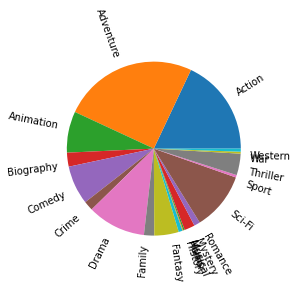

In [435]:
plt.pie(df.values, labels=df.index, rotatelabels='45')

plt.show()

### Ques IMDB Genre Earning

In [467]:
import sqlite3
import pandas

In [468]:
db=sqlite3.connect('IMDB.sqlite')

In [473]:
df=pd.read_sql_query('Select * from IMDB inner join earning on IMDB.Movie_id=earning.Movie_id inner join genre on earning.Movie_id=genre.Movie_id',db)

In [474]:
df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Movie_id,Domestic,Worldwide,Movie_id,genre
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.1,8.0,7.7,8.3,8.0,36809,56671993,1.877332e+08,36809,Biography
1,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.1,8.0,7.7,8.3,8.0,36809,56671993,1.877332e+08,36809,Drama
2,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.1,8.0,7.7,8.3,8.0,36809,56671993,1.877332e+08,36809,History
3,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.6,7.0,7.7,7.6,30114,18335230,6.073880e+07,30114,Adventure
4,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.6,7.0,7.7,7.6,30114,18335230,6.073880e+07,30114,Biography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.3,7.8,7.7,42294,146408305,3.536241e+08,42294,Adventure
347,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.3,7.8,7.7,42294,146408305,3.536241e+08,42294,Sci-Fi
348,32217,Zootopia (2016),8.1,309474,78,150000000.0,108 min,53626,70912,102352,...,8.1,7.7,7.6,8.0,8.0,32217,341268248,1.023784e+09,32217,Adventure
349,32217,Zootopia (2016),8.1,309474,78,150000000.0,108 min,53626,70912,102352,...,8.1,7.7,7.6,8.0,8.0,32217,341268248,1.023784e+09,32217,Animation


In [479]:
df['Total Earning']=df.Worldwide+df.Domestic

In [484]:
resultDf=df.groupby('genre')['Total Earning'].sum()

In [486]:
resultDf.drop('', inplace=True)

In [494]:
totalSum=sum(resultDf)

In [499]:
resultDf=round((resultDf/totalSum)*100,2)

In [500]:
plt.pie?

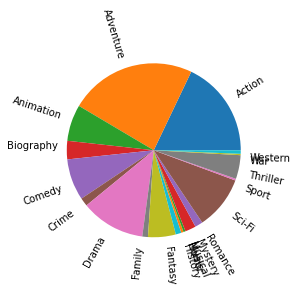

In [502]:
import matplotlib.pyplot as plt

plt.pie(resultDf.values, labels=resultDf.index, rotatelabels='45')

plt.show()

### Ques. Specific Genre

In [570]:
import sqlite3
import pandas

In [571]:
db=sqlite3.connect('IMDB.sqlite')

In [572]:
df=pd.read_sql_query('Select * from IMDB inner join earning on IMDB.Movie_id=earning.Movie_id inner join genre on earning.Movie_id=genre.Movie_id',db)

In [573]:
resultDF=df[(df['genre']=='Sci-Fi') | (df['genre']=='Mystery') ]

In [574]:
groupDF=resultDF.groupby('Title')['genre'].sum()

In [575]:
groupDF[groupDF=='MysterySci-Fi']

Title
Arrival (2016)       MysterySci-Fi
Ex Machina (2014)    MysterySci-Fi
Name: genre, dtype: object

In [576]:
resultDF

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Movie_id,Domestic,Worldwide,Movie_id,genre
19,31722,Arrival (2016),8.0,370842,81,47000000.0,116 min,55533,87850,109536,...,7.7,8.3,7.3,8.0,7.9,31722,100546139,2.033882e+08,31722,Mystery
20,31722,Arrival (2016),8.0,370842,81,47000000.0,116 min,55533,87850,109536,...,7.7,8.3,7.3,8.0,7.9,31722,100546139,2.033882e+08,31722,Sci-Fi
41,49590,Captain America: Civil War (2016),7.9,431555,75,250000000.0,147 min,81893,90156,117188,...,7.9,7.7,7.5,8.1,7.7,49590,408084349,1.153304e+09,49590,Sci-Fi
44,12560,Captain America: The Winter Soldier (2014),7.8,552706,70,170000000.0,136 min,84943,103896,169440,...,7.8,7.6,7.5,8.1,7.5,12560,259766572,7.142643e+08,12560,Sci-Fi
83,33884,Edge of Tomorrow (2014),7.9,480513,71,178000000.0,113 min,60383,99596,175961,...,7.8,8.1,7.5,8.0,7.8,33884,100206256,3.705413e+08,33884,Sci-Fi
88,30161,Ex Machina (2014),7.7,348550,78,15000000.0,108 min,29780,64769,123938,...,7.4,8.2,7.5,7.9,7.7,30161,25442958,3.686941e+07,30161,Mystery
89,30161,Ex Machina (2014),7.7,348550,78,15000000.0,108 min,29780,64769,123938,...,7.4,8.2,7.5,7.9,7.7,30161,25442958,3.686941e+07,30161,Sci-Fi
98,13277,Gone Girl (2014),8.1,649474,79,61000000.0,149 min,89539,177373,218018,...,7.7,8.2,7.6,8.1,8.1,13277,167767189,3.693304e+08,13277,Mystery
100,30401,Gravity (2013),7.8,630890,96,100000000.0,91 min,89986,127616,169693,...,7.5,8.4,7.5,7.9,7.8,30401,274092705,7.231927e+08,30401,Sci-Fi
104,11289,Guardians of the Galaxy (2014),8.1,778220,76,170000000.0,121 min,156606,185326,216876,...,8.0,8.3,7.6,8.3,7.9,11289,333176600,7.733286e+08,11289,Sci-Fi
